In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import json

# (a) (ii) Malta ranks bad when compared to other EU Countries

In [2]:
recycling_rates_df = pd.read_csv("Eurostat_recycling_rate/Cleaned_recycling_rate_of_municipal_waste.csv")
recycling_rates_df.head(10)

,geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Belgium,48.4,48.6,49.4,51,51.7,53.8,54.6,56.8,52.8,54,54.9,54.3,53.4,52.6,53.6,53.4,53.5
1,Bulgaria,15.5,16.1,16.3,16.5,17.2,18.3,19.1,20.6,19.4,19.9,24.5,26.2,25,28.5,23.1,29.4,31.8
2,Czechia,0.9,0.9,0.9,0.9,5.5,6.2,7.4,10.1,10.4,12.4,15.8,17,23.2,24.2,25.4,29.7,33.6
3,Denmark,37.1,36.1,37.6,40.9,41,41,41.8,44.2,47.9,48.8,:,41.5,42.1,43.2,45.1,46.3,47.7
4,Germany,52.5,52.3,56.1,57.8,56.4,60.9,62.1,63.2,63.8,63.1,62.5,63,65.2,63.8,65.6,66.7,66.1
5,Estonia,2.4,5.1,2.7,15,24.8,22.5,17.4,23.1,20.2,21,18.2,23.3,19.1,17.9,31.3,28.3,28.1
6,Ireland,11.9,11.3,18.3,23.6,29.5,31.1,33.1,34.1,33.6,33.5,35.7,36.1,36.6,36.6,39.8,:,:
7,Greece,8.8,8.8,8.8,8.1,10.1,11.8,12.8,20.1,17.7,18.9,17.1,17.8,17,15.8,15.4,15.8,17.2
8,Spain,18.4,21.4,29.3,28.7,30.9,31.4,31.2,30.6,39.7,33.2,29.2,26.7,29.8,32.5,30.8,30,29.7
9,France,24.5,26.1,27.3,28,29,29.7,30.6,31.9,33.3,34.1,36,36.8,37.7,38.7,39.7,40.7,41.7


In [3]:
# ':' means that the data is not available - replace all occurences by nan
def clean_cell(n):
    if(n == ':'):
        return np.nan
    else:
        return n

In [4]:
#use a map to clean all the cells of the data frame 
clean_df = recycling_rates_df.applymap(clean_cell)
clean_df.head(10)

,geo,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Belgium,48.4,48.6,49.4,51,51.7,53.8,54.6,56.8,52.8,54,54.9,54.3,53.4,52.6,53.6,53.4,53.5
1,Bulgaria,15.5,16.1,16.3,16.5,17.2,18.3,19.1,20.6,19.4,19.9,24.5,26.2,25,28.5,23.1,29.4,31.8
2,Czechia,0.9,0.9,0.9,0.9,5.5,6.2,7.4,10.1,10.4,12.4,15.8,17,23.2,24.2,25.4,29.7,33.6
3,Denmark,37.1,36.1,37.6,40.9,41,41,41.8,44.2,47.9,48.8,NaN,41.5,42.1,43.2,45.1,46.3,47.7
4,Germany,52.5,52.3,56.1,57.8,56.4,60.9,62.1,63.2,63.8,63.1,62.5,63,65.2,63.8,65.6,66.7,66.1
5,Estonia,2.4,5.1,2.7,15,24.8,22.5,17.4,23.1,20.2,21,18.2,23.3,19.1,17.9,31.3,28.3,28.1
6,Ireland,11.9,11.3,18.3,23.6,29.5,31.1,33.1,34.1,33.6,33.5,35.7,36.1,36.6,36.6,39.8,NaN,NaN
7,Greece,8.8,8.8,8.8,8.1,10.1,11.8,12.8,20.1,17.7,18.9,17.1,17.8,17,15.8,15.4,15.8,17.2
8,Spain,18.4,21.4,29.3,28.7,30.9,31.4,31.2,30.6,39.7,33.2,29.2,26.7,29.8,32.5,30.8,30,29.7
9,France,24.5,26.1,27.3,28,29,29.7,30.6,31.9,33.3,34.1,36,36.8,37.7,38.7,39.7,40.7,41.7


# First Visualization

In [5]:
#compare the recycling rate of municipal waste of different countries during 2016
df_1 = pd.DataFrame()
df_1['geo'] = clean_df['geo']
df_1['percentage'] = clean_df['2016'].astype(float)
df_1 = df_1.dropna()
df_1 = df_1.sort_values(by=['percentage'])

Text(0, -4, 'Data Source: Eurostat')

<Figure size 864x576 with 0 Axes>

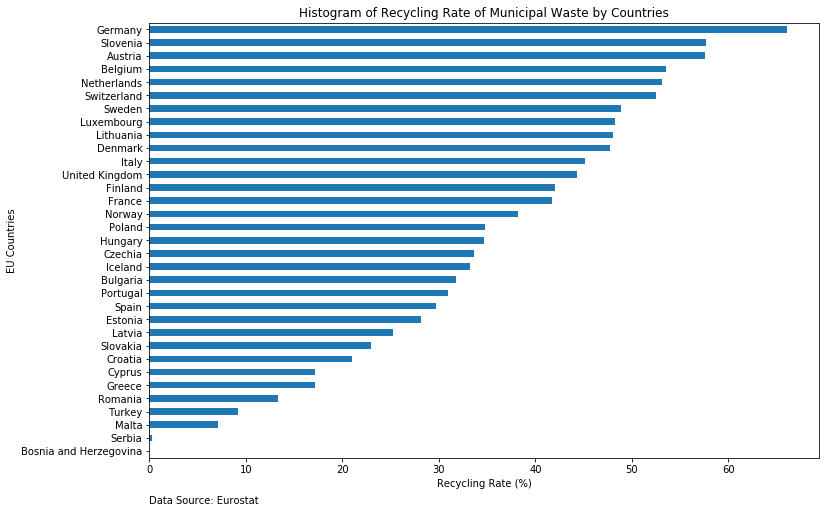

In [6]:
#set the figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.figure()
df_1.plot(kind = 'barh', x = 'geo', legend = False)
plt.title("Histogram of Recycling Rate of Municipal Waste by Countries")
plt.xlabel("Recycling Rate (%)")
plt.ylabel("EU Countries")
plt.text(0, -4, 'Data Source: Eurostat')


# Second Visualization

In [7]:
#compare the recycling rate of municipal waste of Malta along the years
#create a new tabel with the rates of malta from different  
#transpose to convert row into column, start from second element since first is 'geo'
df_2 = clean_df[clean_df['geo'] == 'Malta'].T[1:]
df_2.reset_index(level=0, inplace=True)
df_2 = df_2.rename(columns={df_2.columns[0]: "year", df_2.columns[1]: "percentage"})
df_2['percentage'] = df_2['percentage'].astype(float)

df_2

,year,percentage
0,2000,10.1
1,2001,9.0
2,2002,5.1
3,2003,6.5
4,2004,6.4
5,2005,8.7
6,2006,13.4
7,2007,4.1
8,2008,3.6
9,2009,3.7


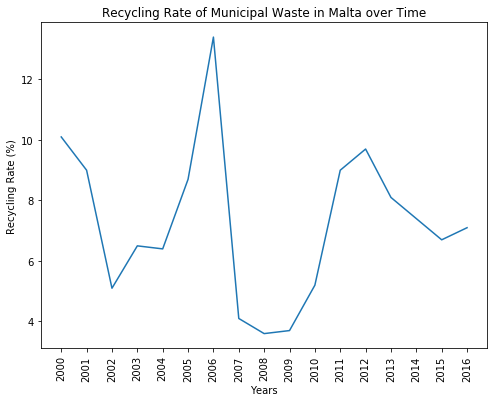

In [8]:
#reset figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

#a line graph is used since the x-axis shows interval data
plt.figure()
plt.plot(df_2['year'], df_2['percentage'])
plt.title("Recycling Rate of Municipal Waste in Malta over Time")
plt.ylabel("Recycling Rate (%)")
plt.xlabel("Years")
plt.xticks(rotation=90)
plt.show()

# (a) (i) Malta ranks well when compared to other EU Countries

In [9]:
total_pop_df = pd.read_csv("Eurostat_housing_conditions/total_population_housing_conditons.csv")
total_pop_df.head(10)

,geo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Belgium,18.0,15.2,19.0,21.2,18.7,18.1,17.5,18.2,19.3,18.5
1,Bulgaria,30.4,23.9,15.4,14.9,13.8,12.9,13.2,12.9,12.3,12.2
2,Czechia,13.8,14.6,11.8,11.9,10.5,10.0,9.2,8.9,8.2,8.0
3,Denmark,8.7,7.8,8.0,16.3,17.6,16.6,15.0,16.1,15.9,14.9
4,Germany,14.0,14.0,13.3,13.7,13.5,13.1,12.3,12.8,13.1,12.5
5,Estonia,17.1,20.2,18.8,19.2,19.4,17.5,15.9,13.4,13.9,13.9
6,Ireland,11.9,13.2,12.6,11.1,13.0,14.3,14.5,13.6,13.4,:
7,Greece,18.6,17.6,17.1,15.3,14.7,14.0,13.7,15.1,14.7,13.5
8,Spain,16.8,18.3,21.8,16.1,12.0,16.7,17.1,15.2,15.9,11.5
9,France,12.8,12.6,12.5,10.9,12.8,12.8,13.4,12.6,14.0,11.1


In [10]:
#use a map to clean all the cells of the data frame 
total_pop_df = total_pop_df.applymap(clean_cell)
total_pop_df.head(10)

,geo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Belgium,18.0,15.2,19.0,21.2,18.7,18.1,17.5,18.2,19.3,18.5
1,Bulgaria,30.4,23.9,15.4,14.9,13.8,12.9,13.2,12.9,12.3,12.2
2,Czechia,13.8,14.6,11.8,11.9,10.5,10.0,9.2,8.9,8.2,8.0
3,Denmark,8.7,7.8,8.0,16.3,17.6,16.6,15.0,16.1,15.9,14.9
4,Germany,14.0,14.0,13.3,13.7,13.5,13.1,12.3,12.8,13.1,12.5
5,Estonia,17.1,20.2,18.8,19.2,19.4,17.5,15.9,13.4,13.9,13.9
6,Ireland,11.9,13.2,12.6,11.1,13.0,14.3,14.5,13.6,13.4,NaN
7,Greece,18.6,17.6,17.1,15.3,14.7,14.0,13.7,15.1,14.7,13.5
8,Spain,16.8,18.3,21.8,16.1,12.0,16.7,17.1,15.2,15.9,11.5
9,France,12.8,12.6,12.5,10.9,12.8,12.8,13.4,12.6,14.0,11.1


# First Visualization

In [11]:
#compare the percentage of total population living in a dwelling in bad conditions of different EU countries in 2017 (last year of collected data)
latest_total_df = pd.DataFrame()
latest_total_df['geo'] = total_pop_df['geo']
latest_total_df['percentage'] = total_pop_df['2017'].astype(float)
#drop the countries that do not have any data recorded for 2017
latest_total_df = latest_total_df.dropna()
#sort according to the percentage of the total population
latest_total_df = latest_total_df.sort_values(by=['percentage'], ascending = False)
latest_total_df

,geo,percentage
12,Cyprus,29.3
21,Portugal,25.5
16,Hungary,24.8
13,Latvia,22.8
23,Slovenia,22.0
0,Belgium,18.5
15,Luxembourg,17.4
11,Italy,16.1
14,Lithuania,15.7
3,Denmark,14.9


Text(0, -4, 'Data Source: Eurostat')

<Figure size 864x648 with 0 Axes>

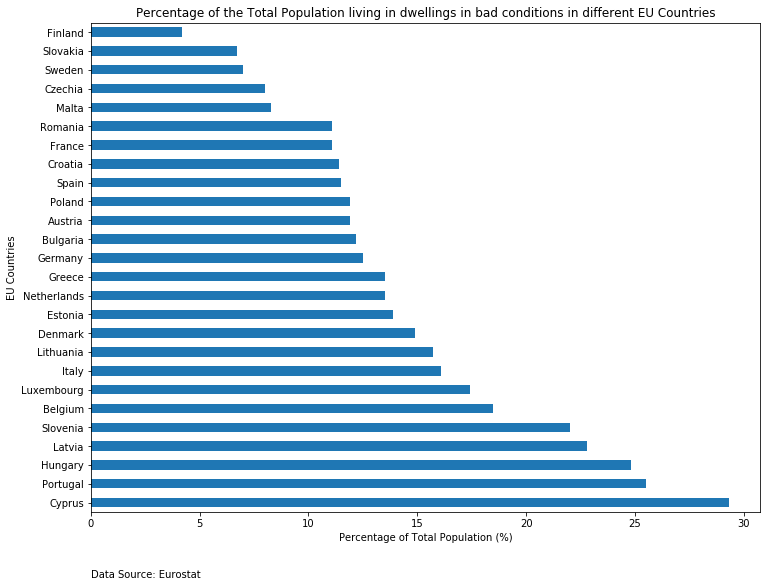

In [12]:
#set the figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.figure()
latest_total_df.plot(kind = 'barh', x = 'geo', legend = False)
plt.title("Percentage of the Total Population living in dwellings in bad conditions in different EU Countries")
plt.ylabel("EU Countries")
plt.xlabel("Percentage of Total Population (%)")
plt.text(0, -4, 'Data Source: Eurostat')

# Second Visualization

In [13]:
# compare average of different age groups living in bad housing conditions

In [14]:
#function to impute missing data
def impute_missing_data(df):
    temp = df.T #transpose to facilitate dictionary creation and imputation
    #compute mean of each country and convert into a dictionary
    temp.columns = temp.iloc[0] #make new header
    temp = temp.drop(temp.index[0]) #drop first col
    temp = temp.apply(pd.to_numeric) #convert whole table to numeric values
    dictionary = temp.dropna().mean().to_dict() #create a new dictionary

    #impute missing values by comupting the mean along the years of that country
    full_data = pd.DataFrame()

    #replace nan by mean of other years of the respective country
    for country_name in list(temp):
        full_data[country_name] = list(map(lambda country:
           dictionary[country_name] if np.isnan(country) else country, temp[country_name]))
    
    new_df = full_data.T
    new_df.columns = ['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']
    return (new_df)

In [15]:
#compute the a dictionary with the mean of each year
def compute_year_mean(full_df):
    full_df = full_df.apply(pd.to_numeric) #covert whole table to numeric values
    mean_dict = full_df.dropna().mean().to_dict()
    return mean_dict

In [16]:
under_18_df = pd.read_csv("Eurostat_housing_conditions/under_18_housing_conditions.csv")
#use a map to clean the data 
under_18_df = under_18_df.applymap(clean_cell)
under_18_full = impute_missing_data(under_18_df)
under_18_full.head(5)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Belgium,20.0,18.3,23.0,25.2,21.6,20.8,21.0,22.0,22.5,22.0
Bulgaria,34.0,25.9,19.2,19.2,18.3,18.5,17.8,15.1,14.5,13.8
Czechia,14.8,16.8,12.1,13.4,11.8,11.6,11.2,9.7,9.4,9.2
Denmark,10.7,9.0,9.4,20.0,21.2,21.2,17.4,19.5,19.0,18.8
Germany,17.5,17.7,15.9,16.8,16.4,15.2,14.6,14.2,16.7,14.9


In [17]:
from_18_to_65_df = pd.read_csv("Eurostat_housing_conditions/18_to_65_housing_conditions.csv")
#use a map to clean the data 
from_18_to_65_df = from_18_to_65_df.applymap(clean_cell)
from_18_to_65_full = impute_missing_data(from_18_to_65_df)
from_18_to_65_full.head(5)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Belgium,18.6,15.2,19.0,21.2,19.2,18.9,17.7,18.6,19.9,19.6
Bulgaria,30.2,23.4,14.5,14.2,12.8,11.8,12.4,12.8,12.3,12.0
Czechia,13.8,14.5,12.0,11.7,10.4,9.8,9.1,9.1,8.3,8.1
Denmark,9.2,8.5,8.7,17.1,19.3,17.9,16.6,17.5,17.4,16.3
Germany,14.8,14.9,14.4,14.8,14.8,14.4,13.7,14.4,14.1,13.6


In [18]:
over_65_df = pd.read_csv("Eurostat_housing_conditions/over_65_housing_conditions.csv")
#use a map to clean the data 
over_65_df = over_65_df.applymap(clean_cell)
over_65_full = impute_missing_data(over_65_df)
over_65_full.head(5)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Belgium,15.0,11.1,16.3,19.4,15.6,13.5,14.3,14.9,16.5,14.4
Bulgaria,30.4,25.1,18.6,14.9,15.3,12.9,12.7,12.8,12.2,13.2
Czechia,13.6,13.4,10.8,11.7,9.4,8.8,7.6,7.6,7.6,6.9
Denmark,3.9,4.6,3.8,9.9,7.7,8.1,8.2,8.9,8.7,7.0
Germany,9.4,9.3,8.8,10.1,9.3,8.8,7.3,7.5,8.4,7.6


In [19]:
#compute mean of each year of the repsective age group
under_18_mean = compute_year_mean(under_18_full)
from_18_to_65_mean = compute_year_mean(from_18_to_65_full)
over_65_mean = compute_year_mean(over_65_full)
under_18_mean

{'2008': 18.849264705882348,
 '2009': 18.102205882352937,
 '2010': 18.57573529411765,
 '2011': 18.459558823529413,
 '2012': 18.374264705882347,
 '2013': 18.467647058823527,
 '2014': 18.082352941176474,
 '2015': 17.32352941176471,
 '2016': 17.573529411764703,
 '2017': 16.47867647058823}

In [20]:
#create a Data Frame that will store average of all age groups along the years
age_groups_df = pd.DataFrame()
age_groups_df = pd.DataFrame(columns = ['Year','Under 18','Between 18 and 65','Over 65'])
age_groups_df['Year'] = pd.Series(['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'])

In [21]:
#insert into age_group_df
age_groups_df['Under 18']= age_groups_df['Year'].map(under_18_mean)
age_groups_df['Between 18 and 65']= age_groups_df['Year'].map(from_18_to_65_mean)
age_groups_df['Over 65']= age_groups_df['Year'].map(over_65_mean)
age_groups_df

,Year,Under 18,Between 18 and 65,Over 65
0,2008,18.849265,17.313235,19.368382
1,2009,18.102206,16.595588,18.497794
2,2010,18.575735,17.090441,18.987500
3,2011,18.459559,16.818382,18.316912
4,2012,18.374265,16.762500,16.981618
5,2013,18.467647,16.926471,16.879412
6,2014,18.082353,16.520588,16.702941
7,2015,17.323529,16.111765,16.085294
8,2016,17.573529,16.141176,15.841176
9,2017,16.478676,15.307353,15.327206


Text(0, 14.5, 'Data Source: Eurostat')

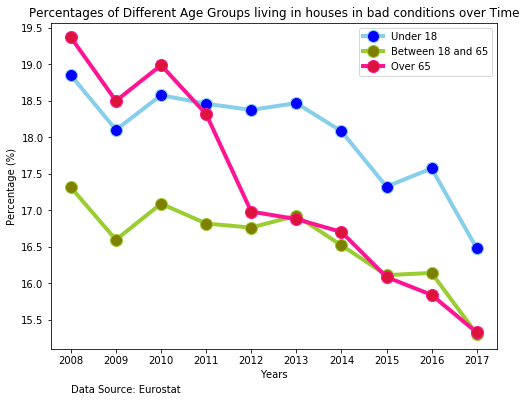

In [22]:
#set the figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

# multiple line plot
plt.figure
plt.plot('Year', 'Under 18', data=age_groups_df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot('Year', 'Between 18 and 65', data=age_groups_df, marker='o', markerfacecolor='olive', markersize=12, color='yellowgreen', linewidth=4)
plt.plot('Year', 'Over 65', data=age_groups_df, marker='o', markerfacecolor='crimson', markersize=12, color='deeppink', linewidth=4)
plt.legend()
plt.title("Percentages of Different Age Groups living in houses in bad conditions over Time")
plt.ylabel("Percentage (%)")
plt.xlabel("Years")
plt.text(0, 14.5, 'Data Source: Eurostat')

# (a) (iii) Extra Geovisualization 

In [23]:
total_population_df = pd.read_csv("Eurostat_housing_conditions/total_population_housing_conditons.csv")
#use a map to clean the data 
total_population_df = total_population_df.applymap(clean_cell)
total_population_full = impute_missing_data(total_population_df)
total_population_full.head(5)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Belgium,18.0,15.2,19.0,21.2,18.7,18.1,17.5,18.2,19.3,18.5
Bulgaria,30.4,23.9,15.4,14.9,13.8,12.9,13.2,12.9,12.3,12.2
Czechia,13.8,14.6,11.8,11.9,10.5,10.0,9.2,8.9,8.2,8.0
Denmark,8.7,7.8,8.0,16.3,17.6,16.6,15.0,16.1,15.9,14.9
Germany,14.0,14.0,13.3,13.7,13.5,13.1,12.3,12.8,13.1,12.5


In [24]:
import folium 
from branca.colormap import linear

In [37]:
#create a dictionary - mean of each country along the years
total_population_mean_dictionary = total_population_full.mean(axis = 1).to_dict()
min_mean = total_population_full.mean(axis = 1).min()
max_mean = total_population_full.mean(axis = 1).max()
total_population_mean_dictionary

{'Belgium': 18.37,
 'Bulgaria': 16.19,
 'Czechia': 10.690000000000001,
 'Denmark': 13.690000000000001,
 'Germany': 13.23,
 'Estonia': 16.93,
 'Ireland': 13.155000000000001,
 'Greece': 15.430000000000001,
 'Spain': 16.14,
 'France': 12.55,
 'Croatia': 13.05,
 'Italy': 21.59,
 'Cyprus': 28.540000000000003,
 'Latvia': 25.48,
 'Lithuania': 19.18,
 'Luxembourg': 16.43,
 'Hungary': 24.68,
 'Malta': 10.0,
 'Netherlands': 15.27,
 'Austria': 12.610000000000001,
 'Poland': 13.27,
 'Portugal': 25.259999999999998,
 'Romania': 16.5,
 'Slovenia': 28.9,
 'Slovakia': 7.18,
 'Finland': 4.950000000000001,
 'Sweden': 7.68,
 'United Kingdom': 15.732500000000002,
 'Iceland': 17.765000000000004,
 'Norway': 7.202500000000001,
 'Switzerland': 10.815000000000001,
 'Former Yugoslav Republic of Macedonia': 15.334999999999999,
 'Serbia': 23.25,
 'Turkey': 39.440000000000005}

In [26]:
#location is the mean of the lat and lon coordinates
m = folium.Map(location=[54.5260, 15.2551], zoom_start=3)
geo_json_data = json.load(open('Eurostat_housing_conditions/europe.json')) 

In [27]:
#create a function that maps one value to a RGB color (of the form #RRGGBB). For this, we'll use colormap tools from folium.colormap
colormap = linear.YlGn_09.scale(
    min_mean,
    max_mean)

colormap

colormap.caption = 'Percentage of Total Population Living in Bad Housing Conditions'
colormap.add_to(m)

In [28]:
folium.GeoJson(
    geo_json_data,
    name='population_mean',
    style_function=lambda feature: {
        'fillColor': colormap(total_population_mean_dictionary[feature['properties']['name']]),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.9,
    }
).add_to(m)

folium.LayerControl().add_to(m)
m

In [29]:
#Save it as html
m.save('GeovisualisationOfCountriesBadHousing.html')

# (b) Reimplement a Bad Visualization from the Local Media

# First Bad Visualization

In [30]:
#source is http://www.independent.com.mt/articles/2018-11-27/local-news/Only-1-7-of-Maltese-cannot-afford-a-car-joint-lowest-rate-in-EU-Eurostat-6736199936
cannot_afford_car_df = pd.DataFrame()
cannot_afford_car_df['Country'] = ['Romania', 'EU', 'Malta', 'Cyprus']
cannot_afford_car_df['Percentage'] = [29.8, 7, 1.7, 1.7]
cannot_afford_car_df

,Country,Percentage
0,Romania,29.8
1,EU,7.0
2,Malta,1.7
3,Cyprus,1.7


<Figure size 576x432 with 0 Axes>

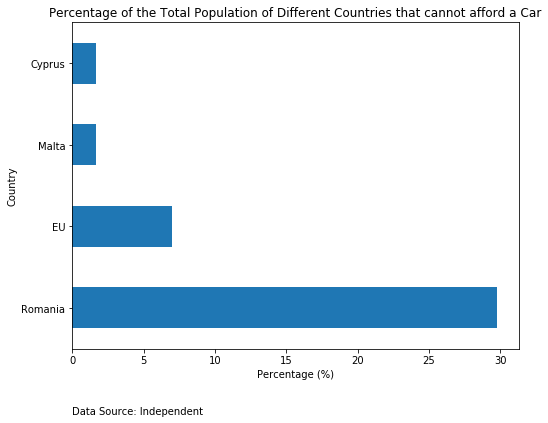

In [31]:
plt.figure()
cannot_afford_car_df.plot(kind = 'barh', x = 'Country', legend = False)
plt.title("Percentage of the Total Population of Different Countries that cannot afford a Car")
plt.xlabel("Percentage (%)")
plt.ylabel("Country")
plt.text(0, -1.3, 'Data Source: Independent')
plt.show()

# Second Bad Visualization

In [32]:
#source: https://www.timesofmalta.com/articles/view/20181129/letters/route-bus-delays.695430

In [33]:
time =['07:15','07:45','8:15','8:45','9:35','10:15','15:05','16:05','16:35','17:05','17:35','18:05','18:35','19:05']
route1 = [0,3,8,14,15,10,4,5,7.8,8.2,10,12.2,17.8,27]
route2 = [4.2,12.5,7.2,15.2,12,10,8,9.4,11,15,22,14,16,18]

In [34]:
#convert the string to numerical values 
d=[]
for i in time:
    c=i.split(':')
    d.append((float(c[0])-7)*60+float(c[1]))

print (d)

[15.0, 45.0, 75.0, 105.0, 155.0, 195.0, 485.0, 545.0, 575.0, 605.0, 635.0, 665.0, 695.0, 725.0]


In [35]:
#edit the x-ticks
time2 = ['7:00','8:00','9:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00']
d2=[]
for i in time2:
    c=i.split(':')
    d2.append((float(c[0])-7)*60+float(c[1]))

print (d2)

[0.0, 60.0, 120.0, 180.0, 240.0, 300.0, 360.0, 420.0, 480.0, 540.0, 600.0, 660.0, 720.0, 780.0]


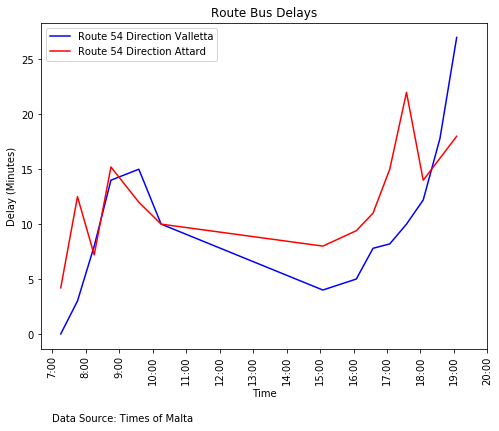

In [36]:
route1_plt, = plt.plot(d, route1, color = 'blue')
route2_plt, = plt.plot(d, route2, color = 'red')

plt.xticks(d2, time2, rotation='vertical')
plt.legend([route1_plt, route2_plt],["Route 54 Direction Valletta","Route 54 Direction Attard"])
plt.title("Route Bus Delays")
plt.xlabel("Time")
plt.ylabel("Delay (Minutes)")
plt.text(0, -8, 'Data Source: Times of Malta')
plt.show()